In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import TimeGrouper
import pylab 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats
from openpyxl.workbook import Workbook
from scipy.stats.stats import pearsonr
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

pd.set_option('display.expand_frame_repr', False)

from datetime import datetime 
from dateutil.relativedelta import *
import os.path
df_arrays=[]
i=0
date=datetime.strptime('012014', "%m%Y").date()

while True:
  
    file_name=r'C:\Python_Projects2\Proje1\datas\Prim_%s.xls'%(date.strftime('%m%Y'))  
    #print(date.strftime('%m%Y'))
    if not os.path.isfile(file_name):
        break;
        if date>datetime.strptime('122018', "%m%Y").date():
            break
        continue;
    xls_file1 = pd.ExcelFile(file_name)
    df1 = xls_file1.parse('Genel Toplam', skiprows=5)
    df_1=df1.iloc[:,1:5]
    new_column=pd.to_datetime(date.strftime("%Y-%m"))
    df_1_1=df_1.assign(dates= new_column)
   
    
    df_1_1.columns=['Sirket','Sirket Kodu','Toplam Uretim','Pazar Payi','Dates']
    
    df_arrays.append(df_1_1)
    date=date+relativedelta(months=+1)
           



result=pd.concat(df_arrays,sort=False,ignore_index=True)
result = result.sort_values(by=['Sirket Kodu','Dates'], inplace=False)
result.columns=['Sirket','SirketKodu','ToplamUretim','PazarPayi','Dates']
#print(m)
filtered_result = result.query("SirketKodu.notnull() and Sirket!='SEKTÖR TOPLAMI'",engine='python')
#filtered_result['Sirket Kodu'].values.dtype
filtered_result1 = filtered_result.groupby('SirketKodu',group_keys=False)
filtered_result2=filtered_result1.apply(lambda x: x.reset_index(drop=True))
#print(filtered_result1)

filtered_result2['year']=filtered_result2['Dates'].dt.year
filtered_result2['month']=filtered_result2['Dates'].dt.month
#filtered_result2=filtered_result2.loc[:,['ToplamUretim','year']]
#filtered_result2['ToplamUretimNew']=filtered_result2['ToplamUretim'].astype(float)
#print(filtered_result2)
#filtered_result2.to_excel("C:\Python_Projects2\Proje1\summary.xlsx")



In [2]:
#Main Insurance Companies
Allianz= filtered_result2[filtered_result2['SirketKodu']==1004]
Anadolu = filtered_result2[filtered_result2['SirketKodu']==1005]
Ak = filtered_result2[filtered_result2['SirketKodu']==1003]
Axa = filtered_result2[filtered_result2['SirketKodu']==1009]
SompoJapan = filtered_result2[filtered_result2['SirketKodu']==1035]
#print(Allianz)

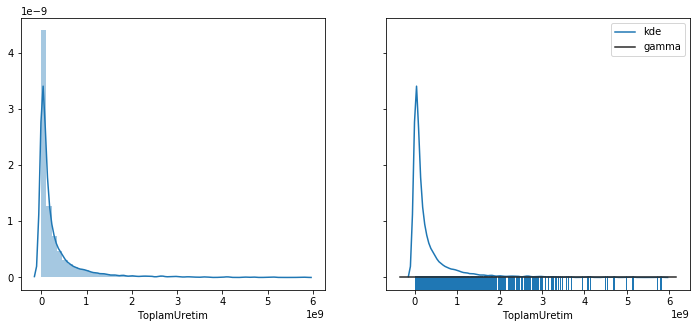

In [3]:
# We create two subplots sharing the same y axis.
f, (ax1, ax2) = plt.subplots(1, 2,
                       figsize=(12, 5),
                       sharey=True)

# Left subplot.
# Histogram and KDE (active by default).
sns.distplot(filtered_result2['ToplamUretim'],
             ax=ax1,
             hist=True)

# Right subplot.
# "Rugplot", KDE, and gamma fit.
sns.distplot(filtered_result2['ToplamUretim'],
             ax=ax2,
             hist=False,
             kde=True,
             rug=True,
             fit=stats.gamma,
             fit_kws=dict(label='gamma'),
             kde_kws=dict(label='kde'))
ax2.legend()



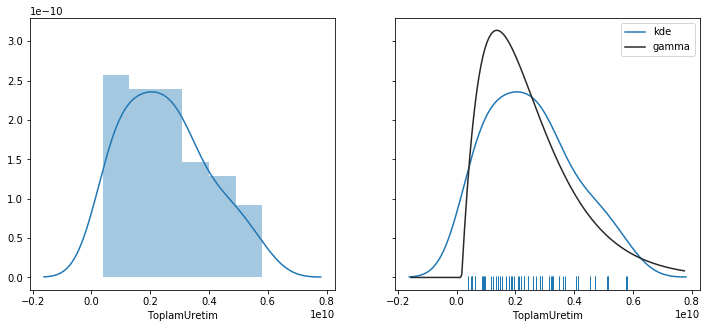

In [4]:
# We create two subplots sharing the same y axis.
f, (ax3, ax4) = plt.subplots(1, 2,
                       figsize=(12, 5),
                       sharey=True)

# Left subplot.
# Histogram and KDE (active by default).
sns.distplot(Allianz['ToplamUretim'],
             ax=ax3,
             hist=True)

# Right subplot.
# "Rugplot", KDE, and gamma fit.
sns.distplot(Allianz['ToplamUretim'],
             ax=ax4,
             hist=False,
             kde=True,
             rug=True,
             fit=stats.gamma,
             fit_kws=dict(label='gamma'),
             kde_kws=dict(label='kde'))
ax4.legend()

In [5]:


##DESCRIPTIVE STATISTICS ALL COMPANIES
print("ALL COMPANIES STATISTICS")
print(filtered_result2.describe())
print("ALLIANZ STATISTICS")
print(Allianz.describe())
print("ANADOLU STATISTICS")
print(Anadolu.describe())
print("AK STATISTICS")
print(Ak.describe())
print("AXA STATISTICS")
print(Axa.describe())
print("SOMPOJAPAN STATISTICS")
print(SompoJapan.describe())
#filtered_result2.mean()
#print(Allianz.describe().std)


#NOT

#2.3e-5, means 2.3 times ten to the minus five power, or 0.000023
#4.5e6 means 4.5 times ten to the sixth power, or 4500000 which is the same as 4,500,000
#Note that in other contexts, e = 2.71828183, the base of natural logarithms. But when used in displaying 
#large or small numbers, e means "times ten to the power of...". 

ALL COMPANIES STATISTICS
        SirketKodu  ToplamUretim    PazarPayi         year        month
count  3760.000000  3.760000e+03  3760.000000  3760.000000  3760.000000
mean   1699.415691  3.375455e+08     0.015960  2015.965957     6.507181
std     893.769232  6.154885e+08     0.024776     1.411167     3.452479
min    1001.000000 -1.969057e+05    -0.000032  2014.000000     1.000000
25%    1017.000000  2.725793e+07     0.001964  2015.000000     4.000000
50%    1036.000000  1.099959e+08     0.006447  2016.000000     7.000000
75%    3003.000000  3.579881e+08     0.017223  2017.000000    10.000000
max    3019.000000  5.809796e+09     0.145033  2018.000000    12.000000
ALLIANZ STATISTICS
       SirketKodu  ToplamUretim  PazarPayi         year      month
count        60.0  6.000000e+01  60.000000    60.000000  60.000000
mean       1004.0  2.517010e+09   0.119775  2016.000000   6.500000
std           0.0  1.464057e+09   0.012315     1.426148   3.481184
min        1004.0  3.782571e+08   0.0959

In [6]:
#ALL COMPANIES TOTAL PREMIUM
All_companies=filtered_result2.loc[:,['ToplamUretim','year']]
All_companies=All_companies.groupby(All_companies['year']).sum()
#print(All_companies)

#ALLIANZ TOTAL PREMIUM SUM
Allianz_premium=Allianz.loc[:,['ToplamUretim','year']]
Allianz_premium=Allianz_premium.groupby(Allianz_premium['year']).sum()
#print(Allianz_premium)


#ANADOLU TOTAL PREMIUM SUM
Anadolu_premium=Anadolu.loc[:,['ToplamUretim','year']]
Anadolu_premium=Anadolu_premium.groupby(Anadolu_premium['year']).sum()
#print(Anadolu_premium)


#AK TOTAL PREMIUM SUM
Ak_premium=Ak.loc[:,['ToplamUretim','year']]
Ak_premium=Ak_premium.groupby(Ak_premium['year']).sum()
#print(Ak_premium)

#AXA TOTAL PREMIUM SUM
Axa_premium=Axa.loc[:,['ToplamUretim','year']]
Axa_premium=Axa_premium.groupby(Axa_premium['year']).sum()
#print(Axa_premium)

#SOMPOJAPAN TOTAL PREMIUM SUM
SompoJapan_premium=SompoJapan.loc[:,['ToplamUretim','year']]
SompoJapan_premium=SompoJapan_premium.groupby(SompoJapan_premium['year']).sum()
#print(SompoJapan_premium)


#plt.scatter(All_companies,Allianz_mean)
#Allianz_mean.columns = year.astype(int)

#ALL COMPANIES MARKET SHARE
All_companies=filtered_result2.loc[:,['PazarPayi','year']]
All_companies=All_companies.groupby(All_companies['year']).mean()
#print(All_companies)

#ALLIANZ TOTAL PREMIUM SUM
Allianz_share=Allianz.loc[:,['PazarPayi','year']]
Allianz_share=Allianz_share.groupby(Allianz_share['year']).mean()
#print(Allianz_share)


#ANADOLU TOTAL PREMIUM SUM
Anadolu_share=Anadolu.loc[:,['PazarPayi','year']]
Anadolu_share=Anadolu_share.groupby(Anadolu_share['year']).mean()
#print(Anadolu_share)


#AK TOTAL PREMIUM SUM
Ak_share=Ak.loc[:,['PazarPayi','year']]
Ak_share=Ak_share.groupby(Ak_share['year']).mean()
#print(Ak_share)

#AXA TOTAL PREMIUM SUM
Axa_share=Axa.loc[:,['PazarPayi','year']]
Axa_share=Axa_share.groupby(Axa_share['year']).mean()
#print(Axa_share)

#SOMPOJAPAN TOTAL PREMIUM SUM
SompoJapan_share=SompoJapan.loc[:,['PazarPayi','year']]
SompoJapan_share=SompoJapan_share.groupby(SompoJapan_share['year']).mean()
#print(SompoJapan_share)


#plt.scatter(All_companies,Allianz_mean)
#Allianz_mean.columns = year.astype(int)



In [7]:
import pandas as pd
import numpy as np


Allianz_ms = Allianz['PazarPayi']
Anadolu_ms = Anadolu['PazarPayi']
Ak_ms = Ak['PazarPayi']
Axa_ms= Axa['PazarPayi']
SompoJapan_ms = SompoJapan['PazarPayi']
#print(Allianz_ms)
#print(SompoJapan)
#ALLIANZ

Main_companies_DF= pd.concat([Allianz_ms,Anadolu_ms, Ak_ms, Axa_ms, SompoJapan_ms], axis=1)


Main_companies_DF.columns=['Allianz_MS','Anadolu_MS','AK_MS','Axa_MS','SompoJapan_MS']


rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = Main_companies_DF.corr()
corr.style.background_gradient()


,Allianz_MS,Anadolu_MS,AK_MS,Axa_MS,SompoJapan_MS
Allianz_MS,1,0.633323,-0.252356,0.741777,-0.0301007
Anadolu_MS,0.633323,1,0.189012,0.758808,-0.36474
AK_MS,-0.252356,0.189012,1,0.214609,-0.725294
Axa_MS,0.741777,0.758808,0.214609,1,-0.580983
SompoJapan_MS,-0.0301007,-0.36474,-0.725294,-0.580983,1


In [8]:
import pandas as pd
import numpy as np


Allianz_ms = Allianz.loc[:,['PazarPayi','year']]
Anadolu_ms = Anadolu.loc[:,['PazarPayi','year']]
Ak_ms = Ak.loc[:,['PazarPayi','year']]
Axa_ms= Axa.loc[:,['PazarPayi','year']]
SompoJapan_ms = SompoJapan.loc[:,['PazarPayi','year']]

#Allianz_ms2018 = Allianz_ms.loc[Allianz_ms['year'] == '2018']
Allianz_ms2018 = Allianz_ms[Allianz_ms.year == 2018]
Anadolu_ms2018 = Anadolu_ms[Anadolu_ms.year == 2018]
Ak_ms2018 = Ak_ms[Ak_ms.year == 2018]
Axa_ms2018 = Axa_ms[Axa_ms.year == 2018]
SompoJapan_ms2018 = SompoJapan_ms[SompoJapan_ms.year == 2018]
#print(Allianz_ms2018)
#print(SompoJapan_ms2018)
#ALLIANZ



Main_companies_DF2018= pd.concat([Allianz_ms2018['PazarPayi'],Anadolu_ms2018['PazarPayi'], Ak_ms2018['PazarPayi'], Axa_ms2018['PazarPayi'], SompoJapan_ms2018['PazarPayi']], axis=1)
#print(Main_companies_DF2018)


Main_companies_DF2018.columns=['Allianz_MS','Anadolu_MS','AK_MS','Axa_MS','SompoJapan_MS']
print(Main_companies_DF2018)

rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = Main_companies_DF2018.corr()
corr.style.background_gradient()


    Allianz_MS  Anadolu_MS     AK_MS    Axa_MS  SompoJapan_MS
48    0.095930    0.095241  0.073834  0.053167       0.039331
49    0.096715    0.093592  0.065026  0.053809       0.040166
50    0.100602    0.094387  0.063850  0.057546       0.040764
51    0.102450    0.099968  0.061879  0.056362       0.041694
52    0.102183    0.103061  0.060566  0.056322       0.043187
53    0.103747    0.102585  0.060119  0.056644       0.043937
54    0.110564    0.101274  0.050655  0.061470       0.043983
55    0.109183    0.100472  0.052128  0.060479       0.046197
56    0.104320    0.103219  0.061924  0.058058       0.045755
57    0.107172    0.103141  0.061766  0.059688       0.045513
58    0.106255    0.103052  0.062146  0.060971       0.045857
59    0.106302    0.104318  0.062527  0.061747       0.045893


,Allianz_MS,Anadolu_MS,AK_MS,Axa_MS,SompoJapan_MS
Allianz_MS,1,0.72472,-0.844066,0.924349,0.856492
Anadolu_MS,0.72472,1,-0.446401,0.6589,0.86399
AK_MS,-0.844066,-0.446401,1,-0.679145,-0.597145
Axa_MS,0.924349,0.6589,-0.679145,1,0.837489
SompoJapan_MS,0.856492,0.86399,-0.597145,0.837489,1


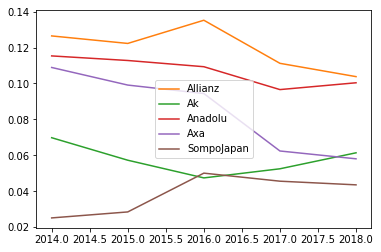

In [9]:
x = All_companies.index
#y1 = All_companies['PazarPayi']
y2 = Allianz_share['PazarPayi']
y3 =Ak_share['PazarPayi']
y4= Anadolu_share['PazarPayi']
y5=Axa_share['PazarPayi']
y6=SompoJapan_share['PazarPayi']

#plt.plot(x,y1)
plt.plot(x,y2,'C1', label="Allianz")
plt.plot(x,y3,'C2', label='Ak')
plt.plot(x,y4,'C3', label='Anadolu')
plt.plot(x,y5, 'C4', label='Axa')
plt.plot(x,y6, 'C5', label='SompoJapan')
plt.legend()
plt.show()

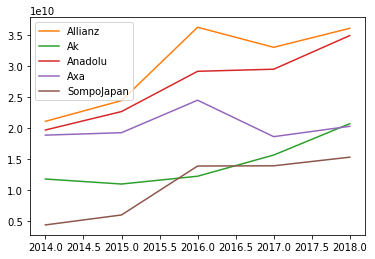

In [10]:
x = All_companies.index
#y1 = All_companies['PazarPayi']
y2 = Allianz_premium['ToplamUretim']
y3 =Ak_premium['ToplamUretim']
y4= Anadolu_premium['ToplamUretim']
y5=Axa_premium['ToplamUretim']
y6=SompoJapan_premium['ToplamUretim']

#plt.plot(x,y1)
plt.plot(x,y2,'C1', label="Allianz")
plt.plot(x,y3,'C2', label='Ak')
plt.plot(x,y4,'C3', label='Anadolu')
plt.plot(x,y5, 'C4', label='Axa')
plt.plot(x,y6, 'C5', label='SompoJapan')
plt.legend()
plt.show()

In [11]:
#ALL COMPANIES TOTAL PREMIUM  SUM & GDP OF TURKEY & REAL GROWTH
All_companiesSum=filtered_result2.loc[:,['ToplamUretim','year']]
All_companiesSum=All_companiesSum.groupby(All_companiesSum['year']).sum()
#ALL COMPANIES TOTAL PREMIUM  SUM & GDP OF TURKEY & REAL GROWTH
#Allianz_Ratio=Allianz.loc[:,['ToplamUretim','year']]
#Allianz_Ratio=Allianz_Ratio.groupby(Allianz_Ratio['year']).sum()

All_companiesSum['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 0], index=All_companiesSum.index)
All_companiesSum['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=All_companiesSum.index)



All_companiesSum['AllCompCumPremiumRatio']=(100*(All_companiesSum['ToplamUretim']-All_companiesSum['ToplamUretim'].shift(1)))/All_companiesSum['ToplamUretim']
All_companiesSum['GdpRatio']=(100*(All_companiesSum['TotalGDP']-All_companiesSum['TotalGDP'].shift(1)))/All_companiesSum['TotalGDP']
All_companiesSum['CPIRatio']=(100*(All_companiesSum['TotalCPI']-All_companiesSum['TotalCPI'].shift(1)))/All_companiesSum['TotalCPI']
All_companiesSum['ComRealGrowth']=All_companiesSum['AllCompCumPremiumRatio']-All_companiesSum['CPIRatio']
All_companiesSum['GDPRealGrowth']=All_companiesSum['GdpRatio']-All_companiesSum['CPIRatio']
print(All_companiesSum)

      ToplamUretim  TotalGDP  TotalCPI  AllCompCumPremiumRatio   GdpRatio   CPIRatio  ComRealGrowth  GDPRealGrowth
year                                                                                                              
2014  1.692928e+11   2044465   242.020                     NaN        NaN        NaN            NaN            NaN
2015  1.968533e+11   2338647   260.585               14.000496  12.579154   7.124355       6.876141       5.454799
2016  2.613151e+11   2608525   280.860               24.668255  10.346000   7.218899      17.449356       3.127101
2017  2.988593e+11   3106536   312.150               12.562492  16.031071  10.024027       2.538466       6.007044
2018  3.428507e+11         0   363.125               12.831061       -inf  14.037866      -1.206804           -inf


In [12]:
Allianz_Ratio=Allianz.loc[:,['ToplamUretim','year']]
Allianz_Ratio=Allianz_Ratio.groupby(Allianz_Ratio['year']).sum()

Allianz_Ratio['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 0], index=Allianz_Ratio.index)
Allianz_Ratio['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=Allianz_Ratio.index)

Allianz_Ratio['AllianzPremiumRatio']=(100*(Allianz_Ratio['ToplamUretim']-Allianz_Ratio['ToplamUretim'].shift(1)))/Allianz_Ratio['ToplamUretim']
#All_companiesSum['GdpRatio']=(100*(All_companiesSum['TotalGDP']-All_companiesSum['TotalGDP'].shift(1)))/All_companiesSum['TotalGDP']
Allianz_Ratio['CPIRatio']=(100*(Allianz_Ratio['TotalCPI']-Allianz_Ratio['TotalCPI'].shift(1)))/Allianz_Ratio['TotalCPI']
Allianz_Ratio['AllianzRealGrowth']=Allianz_Ratio['AllianzPremiumRatio']-Allianz_Ratio['CPIRatio']

print(Allianz_Ratio)

      ToplamUretim  TotalGDP  TotalCPI  AllianzPremiumRatio   CPIRatio  AllianzRealGrowth
year                                                                                     
2014  2.109576e+10   2044465   242.020                  NaN        NaN                NaN
2015  2.444523e+10   2338647   260.585            13.701940   7.124355           6.577585
2016  3.629872e+10   2608525   280.860            32.655393   7.218899          25.436494
2017  3.305530e+10   3106536   312.150            -9.812097  10.024027         -19.836124
2018  3.612562e+10         0   363.125             8.499003  14.037866          -5.538863


In [13]:
Anadolu_Ratio=Anadolu.loc[:,['ToplamUretim','year']]
Anadolu_Ratio=Anadolu_Ratio.groupby(Anadolu_Ratio['year']).sum()

Anadolu_Ratio['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 0], index=Anadolu_Ratio.index)
Anadolu_Ratio['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=Anadolu_Ratio.index)

Anadolu_Ratio['AnadoluPremiumRatio']=(100*(Anadolu_Ratio['ToplamUretim']-Anadolu_Ratio['ToplamUretim'].shift(1)))/Anadolu_Ratio['ToplamUretim']
#All_companiesSum['GdpRatio']=(100*(All_companiesSum['TotalGDP']-All_companiesSum['TotalGDP'].shift(1)))/All_companiesSum['TotalGDP']
Anadolu_Ratio['CPIRatio']=(100*(Anadolu_Ratio['TotalCPI']-Anadolu_Ratio['TotalCPI'].shift(1)))/Anadolu_Ratio['TotalCPI']
Anadolu_Ratio['AnadoluRealGrowth']=Anadolu_Ratio['AnadoluPremiumRatio']-Anadolu_Ratio['CPIRatio']

print(Anadolu_Ratio)

      ToplamUretim  TotalGDP  TotalCPI  AnadoluPremiumRatio   CPIRatio  AnadoluRealGrowth
year                                                                                     
2014  1.969551e+10   2044465   242.020                  NaN        NaN                NaN
2015  2.267474e+10   2338647   260.585            13.138978   7.124355           6.014624
2016  2.917979e+10   2608525   280.860            22.292985   7.218899          15.074086
2017  2.951813e+10   3106536   312.150             1.146223  10.024027          -8.877804
2018  3.495446e+10         0   363.125            15.552613  14.037866           1.514748


In [14]:
Ak_Ratio=Ak.loc[:,['ToplamUretim','year']]
Ak_Ratio=Ak_Ratio.groupby(Ak_Ratio['year']).sum()

Ak_Ratio['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 0], index=Ak_Ratio.index)
Ak_Ratio['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=Ak_Ratio.index)

Ak_Ratio['AkPremiumRatio']=(100*(Ak_Ratio['ToplamUretim']-Ak_Ratio['ToplamUretim'].shift(1)))/Ak_Ratio['ToplamUretim']
#All_companiesSum['GdpRatio']=(100*(All_companiesSum['TotalGDP']-All_companiesSum['TotalGDP'].shift(1)))/All_companiesSum['TotalGDP']
Ak_Ratio['CPIRatio']=(100*(Ak_Ratio['TotalCPI']-Ak_Ratio['TotalCPI'].shift(1)))/Ak_Ratio['TotalCPI']
Ak_Ratio['AkRealGrowth']=Ak_Ratio['AkPremiumRatio']-Ak_Ratio['CPIRatio']

print(Ak_Ratio)

      ToplamUretim  TotalGDP  TotalCPI  AkPremiumRatio   CPIRatio  AkRealGrowth
year                                                                           
2014  1.177444e+10   2044465   242.020             NaN        NaN           NaN
2015  1.096720e+10   2338647   260.585       -7.360482   7.124355    -14.484837
2016  1.222680e+10   2608525   280.860       10.301962   7.218899      3.083063
2017  1.564763e+10   3106536   312.150       21.861652  10.024027     11.837625
2018  2.071895e+10         0   363.125       24.476721  14.037866     10.438856


In [15]:
Axa_Ratio=Axa.loc[:,['ToplamUretim','year']]
Axa_Ratio=Axa_Ratio.groupby(Axa_Ratio['year']).sum()

Axa_Ratio['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 0], index=Axa_Ratio.index)
Axa_Ratio['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=Axa_Ratio.index)

Axa_Ratio['AxaPremiumRatio']=(100*(Axa_Ratio['ToplamUretim']-Axa_Ratio['ToplamUretim'].shift(1)))/Axa_Ratio['ToplamUretim']
#All_companiesSum['GdpRatio']=(100*(All_companiesSum['TotalGDP']-All_companiesSum['TotalGDP'].shift(1)))/All_companiesSum['TotalGDP']
Axa_Ratio['CPIRatio']=(100*(Axa_Ratio['TotalCPI']-Axa_Ratio['TotalCPI'].shift(1)))/Axa_Ratio['TotalCPI']
Axa_Ratio['AxaRealGrowth']=Axa_Ratio['AxaPremiumRatio']-Axa_Ratio['CPIRatio']

print(Axa_Ratio)

      ToplamUretim  TotalGDP  TotalCPI  AxaPremiumRatio   CPIRatio  AxaRealGrowth
year                                                                             
2014  1.886744e+10   2044465   242.020              NaN        NaN            NaN
2015  1.925959e+10   2338647   260.585         2.036093   7.124355      -5.088262
2016  2.450872e+10   2608525   280.860        21.417427   7.218899      14.198528
2017  1.861955e+10   3106536   312.150       -31.628991  10.024027     -41.653018
2018  2.029228e+10         0   363.125         8.243194  14.037866      -5.794671


In [16]:
SompoJapan_Ratio=SompoJapan.loc[:,['ToplamUretim','year']]
SompoJapan_Ratio=SompoJapan_Ratio.groupby(SompoJapan_Ratio['year']).sum()

SompoJapan_Ratio['TotalGDP']=pd.Series([2044465, 2338647, 2608525, 3106536, 0], index=SompoJapan_Ratio.index)
SompoJapan_Ratio['TotalCPI']=pd.Series([242.02, 260.585, 280.86, 312.15, 363.125], index=SompoJapan_Ratio.index)

SompoJapan_Ratio['SompoJapanPremiumRatio']=(100*(SompoJapan_Ratio['ToplamUretim']-SompoJapan_Ratio['ToplamUretim'].shift(1)))/SompoJapan_Ratio['ToplamUretim']
#All_companiesSum['GdpRatio']=(100*(All_companiesSum['TotalGDP']-All_companiesSum['TotalGDP'].shift(1)))/All_companiesSum['TotalGDP']
SompoJapan_Ratio['CPIRatio']=(100*(SompoJapan_Ratio['TotalCPI']-SompoJapan_Ratio['TotalCPI'].shift(1)))/SompoJapan_Ratio['TotalCPI']
SompoJapan_Ratio['SompoJapanRealGrowth']=SompoJapan_Ratio['SompoJapanPremiumRatio']-SompoJapan_Ratio['CPIRatio']

print(SompoJapan_Ratio)

      ToplamUretim  TotalGDP  TotalCPI  SompoJapanPremiumRatio   CPIRatio  SompoJapanRealGrowth
year                                                                                           
2014  4.359686e+09   2044465   242.020                     NaN        NaN                   NaN
2015  5.968819e+09   2338647   260.585               26.958974   7.124355             19.834619
2016  1.387416e+10   2608525   280.860               56.978877   7.218899             49.759978
2017  1.391257e+10   3106536   312.150                0.276069  10.024027             -9.747958
2018  1.530386e+10         0   363.125                9.091107  14.037866             -4.946759


c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


      Allianz_rg  Anadolu_rg      AK_rg     Axa_rg  SompoJapan_rg
year                                                             
2014         NaN         NaN        NaN        NaN            NaN
2015    6.577585    6.014624 -14.484837  -5.088262      19.834619
2016   25.436494   15.074086   3.083063  14.198528      49.759978
2017  -19.836124   -8.877804  11.837625 -41.653018      -9.747958
2018   -5.538863    1.514748  10.438856  -5.794671      -4.946759


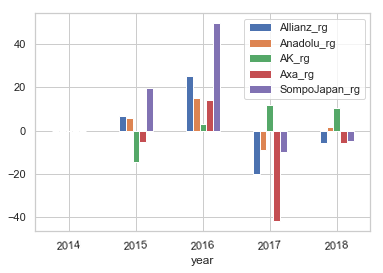

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

Allianz_rg = Allianz_Ratio.loc[:,['AllianzRealGrowth','year']]
Anadolu_rg = Anadolu_Ratio.loc[:,['AnadoluRealGrowth','year']]
Ak_rg = Ak_Ratio.loc[:,['AkRealGrowth','year']]
Axa_rg= Axa_Ratio.loc[:,['AxaRealGrowth','year']]
SompoJapan_rg = SompoJapan_Ratio.loc[:,['SompoJapanRealGrowth','year']]


Main_companies_rg= pd.concat([Allianz_rg['AllianzRealGrowth'],Anadolu_rg['AnadoluRealGrowth'], Ak_rg['AkRealGrowth'], Axa_rg['AxaRealGrowth'], SompoJapan_rg['SompoJapanRealGrowth']], axis=1)
#print(Main_companies_DF2018)


Main_companies_rg.columns=['Allianz_rg','Anadolu_rg','AK_rg','Axa_rg','SompoJapan_rg']
print(Main_companies_rg)

ax = Main_companies_rg.plot.bar(rot=4)

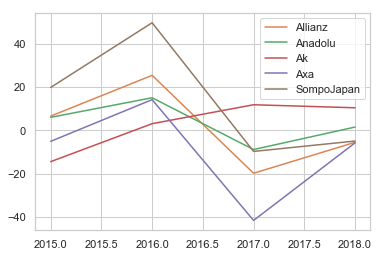

In [18]:
x = All_companiesSum.index
#y1 = All_companies['PazarPayi']
y2 =Allianz_Ratio['AllianzRealGrowth']
y3 =Anadolu_Ratio['AnadoluRealGrowth']
y4= Ak_Ratio['AkRealGrowth']
y5=Axa_Ratio['AxaRealGrowth']
y6=SompoJapan_Ratio['SompoJapanRealGrowth']

#plt.plot(x,y1)
plt.plot(x,y2,'C1', label="Allianz")
plt.plot(x,y3,'C2', label='Anadolu')
plt.plot(x,y4,'C3', label='Ak')
plt.plot(x,y5, 'C4', label='Axa')
plt.plot(x,y6, 'C5', label='SompoJapan')
plt.legend()
plt.show()

            2014          2015          2016          2017          2018
0   3.863281e+08  3.782571e+08  4.946697e+08  5.241938e+08  5.218500e+08
1   6.240954e+08  6.218240e+08  8.679779e+08  9.502651e+08  9.452704e+08
2   9.027969e+08  9.046878e+08  1.330992e+09  1.421382e+09  1.468685e+09
3   1.155588e+09  1.244728e+09  1.793541e+09  1.788783e+09  1.953612e+09
4   1.419032e+09  1.537019e+09  2.289191e+09  2.198829e+09  2.424328e+09
5   1.665511e+09  1.838133e+09  2.822341e+09  2.604344e+09  2.892109e+09
6   1.885828e+09  2.124246e+09  3.262754e+09  2.916179e+09  2.916179e+09
7   2.078163e+09  2.413630e+09  3.692622e+09  3.244577e+09  3.244577e+09
8   2.305741e+09  2.714334e+09  4.135294e+09  3.609578e+09  4.121067e+09
9   2.610495e+09  3.139411e+09  4.696252e+09  4.137348e+09  4.700092e+09
10  2.845998e+09  3.478088e+09  5.137947e+09  4.525746e+09  5.128053e+09
11  3.216182e+09  4.050873e+09  5.775138e+09  5.134074e+09  5.809796e+09


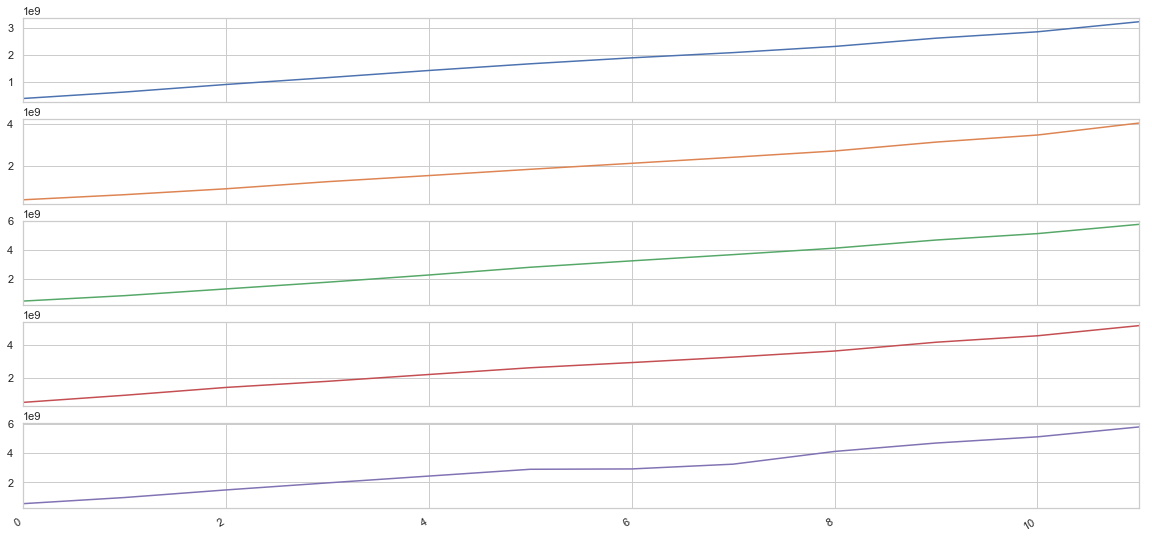

In [19]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

Allianz_sea=Allianz.loc[:,['ToplamUretim','year','month']]
#fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots(figsize=(12,1))
#Allianz_sea=Allianz_sea.groupby(Allianz_sea['month'], group_keys=False)
#Allianz_sea=Allianz_sea.apply(lambda x: x.reset_index(drop=True))
pylab.rcParams['figure.figsize'] = (20, 10)

series = Allianz_sea
groups = Allianz_sea.groupby(Allianz_sea['year'])
#print(list(groups))
years = DataFrame()
for name, group in groups:
    years[name] = group['ToplamUretim'].values
    #print(name)
    #print(group)
print(years)
years.plot(subplots=True, legend=False)
pyplot.show()

            2014          2015          2016          2017          2018
0   2.981003e+08  3.263918e+08  3.805634e+08  3.987321e+08  5.181038e+08
1   5.170485e+08  5.342471e+08  6.691524e+08  7.191576e+08  9.147442e+08
2   7.870166e+08  8.182075e+08  1.088124e+09  1.122455e+09  1.377949e+09
3   1.052040e+09  1.129231e+09  1.515503e+09  1.560354e+09  1.906278e+09
4   1.350690e+09  1.484241e+09  2.018273e+09  1.969977e+09  2.445177e+09
5   1.593378e+09  1.788156e+09  2.439572e+09  2.333060e+09  2.859707e+09
6   1.810868e+09  2.067325e+09  2.710123e+09  2.671137e+09  2.671137e+09
7   2.021532e+09  2.332270e+09  3.008138e+09  2.985708e+09  2.985708e+09
8   2.217743e+09  2.597634e+09  3.312472e+09  3.330792e+09  4.077565e+09
9   2.416503e+09  2.848750e+09  3.611685e+09  3.676627e+09  4.523310e+09
10  2.625761e+09  3.137612e+09  3.942121e+09  4.078718e+09  4.973426e+09
11  3.004830e+09  3.610674e+09  4.484060e+09  4.671410e+09  5.701355e+09


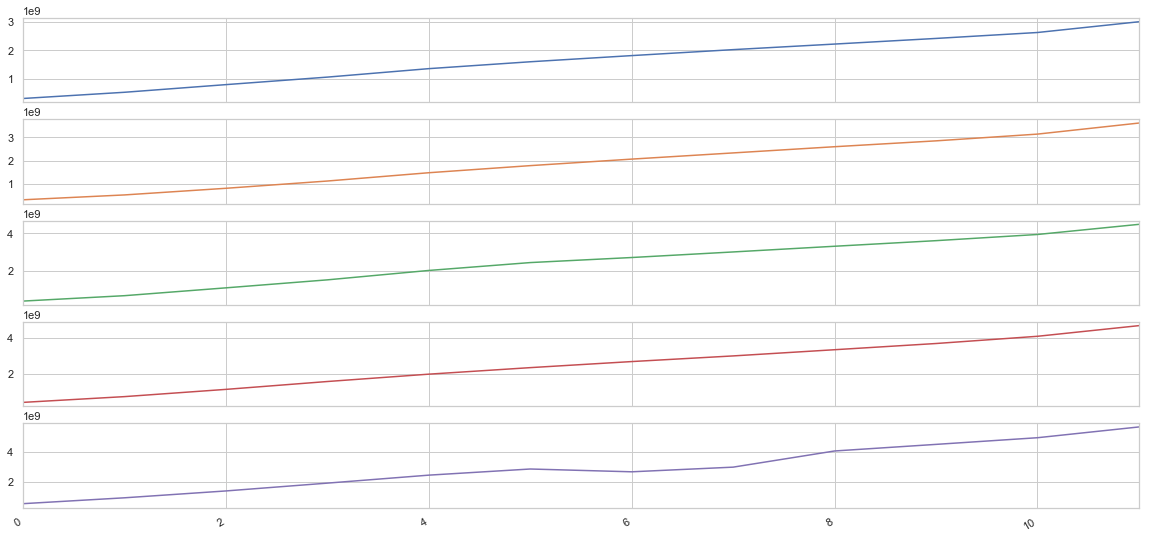

In [20]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

Anadolu_sea=Anadolu.loc[:,['ToplamUretim','year','month']]
#fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots(figsize=(12,1))
#Allianz_sea=Allianz_sea.groupby(Allianz_sea['month'], group_keys=False)
#Allianz_sea=Allianz_sea.apply(lambda x: x.reset_index(drop=True))
pylab.rcParams['figure.figsize'] = (20, 10)

series = Anadolu_sea
groups = Anadolu_sea.groupby(Anadolu_sea['year'])
#print(list(groups))
years = DataFrame()
for name, group in groups:
    years[name] = group['ToplamUretim'].values
    #print(name)
    #print(group)
print(years)
years.plot(subplots=True, legend=False)
pyplot.show()

            2014          2015          2016          2017          2018
0   1.911074e+08  2.017572e+08  2.139139e+08  2.733874e+08  4.016502e+08
1   3.423576e+08  3.214103e+08  3.428129e+08  4.209258e+08  6.355477e+08
2   4.763392e+08  4.557205e+08  4.991758e+08  6.153779e+08  9.321451e+08
3   6.286978e+08  6.053642e+08  6.379333e+08  7.641454e+08  1.179967e+09
4   7.719866e+08  7.239466e+08  7.837614e+08  9.512328e+08  1.436958e+09
5   9.512357e+08  8.846977e+08  9.703360e+08  1.117866e+09  1.675919e+09
6   1.101806e+09  1.016222e+09  1.118720e+09  1.336032e+09  1.336032e+09
7   1.231725e+09  1.121923e+09  1.250992e+09  1.549080e+09  1.549080e+09
8   1.353833e+09  1.235548e+09  1.377678e+09  1.755566e+09  2.446270e+09
9   1.454544e+09  1.336576e+09  1.497345e+09  1.981021e+09  2.708781e+09
10  1.557191e+09  1.441847e+09  1.638566e+09  2.247418e+09  2.999263e+09
11  1.713615e+09  1.622187e+09  1.895566e+09  2.635579e+09  3.417338e+09


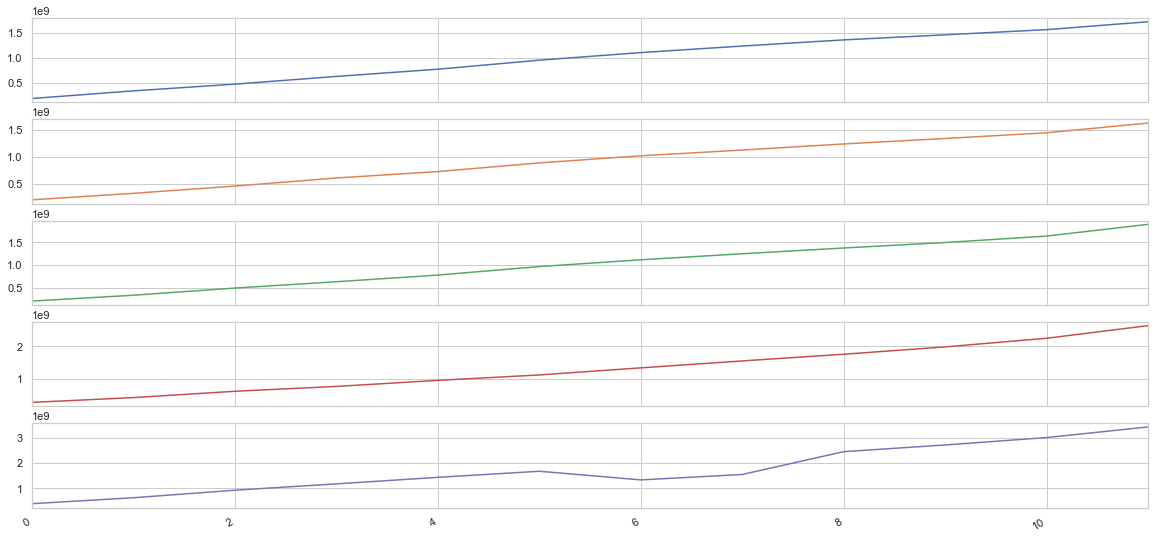

In [21]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

Ak_sea=Ak.loc[:,['ToplamUretim','year','month']]
#fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots(figsize=(12,1))
#Allianz_sea=Allianz_sea.groupby(Allianz_sea['month'], group_keys=False)
#Allianz_sea=Allianz_sea.apply(lambda x: x.reset_index(drop=True))
pylab.rcParams['figure.figsize'] = (20, 10)

series = Ak_sea
groups = Ak_sea.groupby(Ak_sea['year'])
#print(list(groups))
years = DataFrame()
for name, group in groups:
    years[name] = group['ToplamUretim'].values
    #print(name)
    #print(group)
print(years)
years.plot(subplots=True, legend=False)
pyplot.show()

            2014          2015          2016          2017          2018
0   2.826350e+08  3.209466e+08  3.324817e+08  2.808836e+08  2.892258e+08
1   4.726584e+08  5.543088e+08  6.763152e+08  5.215852e+08  5.259208e+08
2   7.408485e+08  8.414630e+08  1.082994e+09  8.307571e+08  8.401187e+08
3   9.810267e+08  1.037412e+09  1.368808e+09  1.030226e+09  1.074764e+09
4   1.202129e+09  1.248617e+09  1.688551e+09  1.222245e+09  1.336256e+09
5   1.420100e+09  1.467598e+09  2.000191e+09  1.421366e+09  1.579047e+09
6   1.649317e+09  1.691112e+09  2.306948e+09  1.621304e+09  1.621304e+09
7   1.859610e+09  1.867032e+09  2.538875e+09  1.797252e+09  1.797252e+09
8   2.123660e+09  2.093657e+09  2.760214e+09  2.095811e+09  2.293540e+09
9   2.385062e+09  2.389446e+09  2.977745e+09  2.324538e+09  2.617637e+09
10  2.672281e+09  2.682306e+09  3.213134e+09  2.565370e+09  2.942546e+09
11  3.078115e+09  3.065688e+09  3.562467e+09  2.908210e+09  3.374670e+09


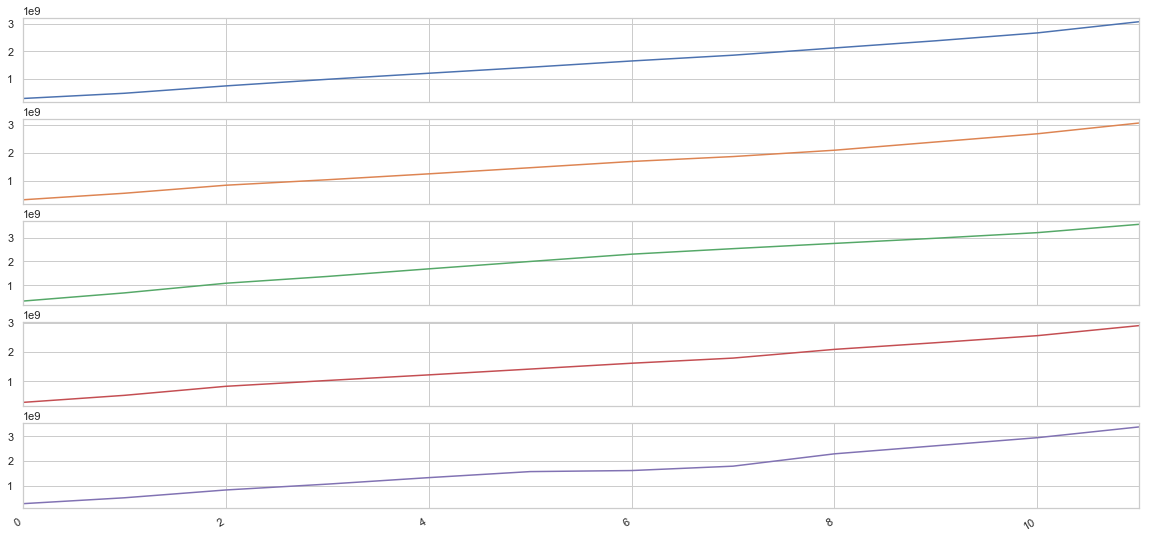

In [22]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

Axa_sea=Axa.loc[:,['ToplamUretim','year','month']]
#fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots(figsize=(12,1))
#Allianz_sea=Allianz_sea.groupby(Allianz_sea['month'], group_keys=False)
#Allianz_sea=Allianz_sea.apply(lambda x: x.reset_index(drop=True))
pylab.rcParams['figure.figsize'] = (20, 10)

series = Axa_sea
groups = Axa_sea.groupby(Axa_sea['year'])
#print(list(groups))
years = DataFrame()
for name, group in groups:
    years[name] = group['ToplamUretim'].values
    #print(name)
    #print(group)
print(years)
years.plot(subplots=True, legend=False)
pyplot.show()

            2014          2015          2016          2017          2018
0   6.005794e+07  6.646348e+07  1.301721e+08  1.911487e+08  2.139593e+08
1   1.147066e+08  1.287115e+08  2.949576e+08  3.803656e+08  3.925772e+08
2   1.664164e+08  1.935544e+08  4.796782e+08  5.741557e+08  5.951070e+08
3   2.209131e+08  2.706966e+08  6.748125e+08  7.137042e+08  7.950672e+08
4   2.775573e+08  3.451676e+08  8.780617e+08  8.445491e+08  1.024628e+09
5   3.356413e+08  4.399536e+08  1.075469e+09  9.964257e+08  1.224808e+09
6   3.983964e+08  5.236615e+08  1.251676e+09  1.160058e+09  1.160058e+09
7   4.459640e+08  5.946110e+08  1.437879e+09  1.372819e+09  1.372819e+09
8   4.979176e+08  6.786233e+08  1.617234e+09  1.595650e+09  1.807507e+09
9   5.487860e+08  7.699218e+08  1.803733e+09  1.807440e+09  1.995979e+09
10  6.065414e+08  8.939798e+08  1.994329e+09  2.012879e+09  2.213138e+09
11  6.867885e+08  1.063474e+09  2.236156e+09  2.263372e+09  2.508210e+09


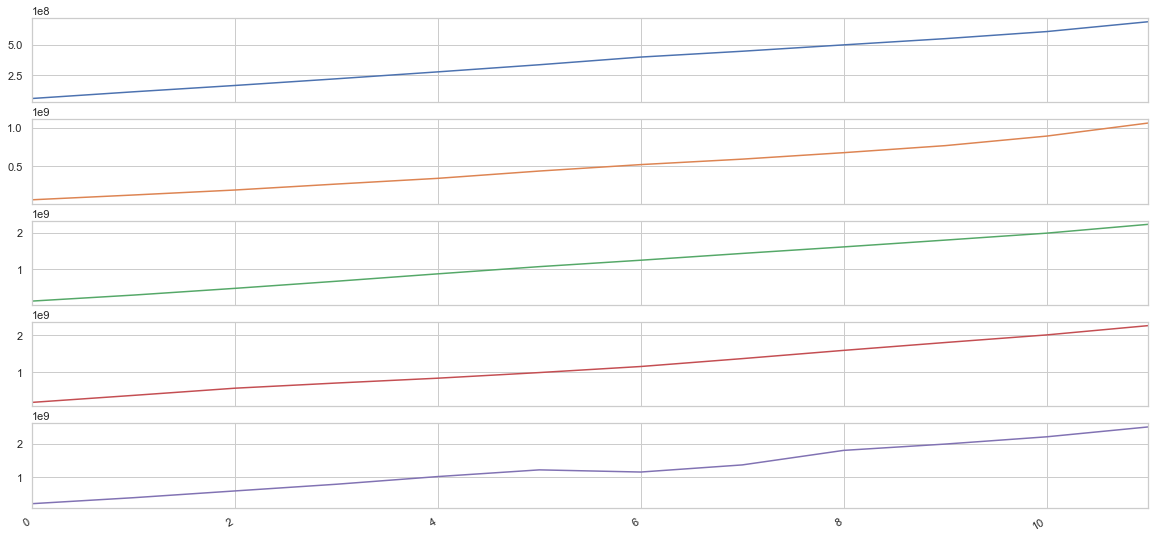

In [23]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

SompoJapan_sea=SompoJapan.loc[:,['ToplamUretim','year','month']]
#fig, ax = plt.subplots(figsize=(20, 10))
#fig, ax = plt.subplots(figsize=(12,1))
#Allianz_sea=Allianz_sea.groupby(Allianz_sea['month'], group_keys=False)
#Allianz_sea=Allianz_sea.apply(lambda x: x.reset_index(drop=True))
pylab.rcParams['figure.figsize'] = (20, 10)

series = SompoJapan_sea
groups = SompoJapan_sea.groupby(SompoJapan_sea['year'])
#print(list(groups))
years = DataFrame()
for name, group in groups:
    years[name] = group['ToplamUretim'].values
    #print(name)
    #print(group)
print(years)
years.plot(subplots=True, legend=False)
pyplot.show()

c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


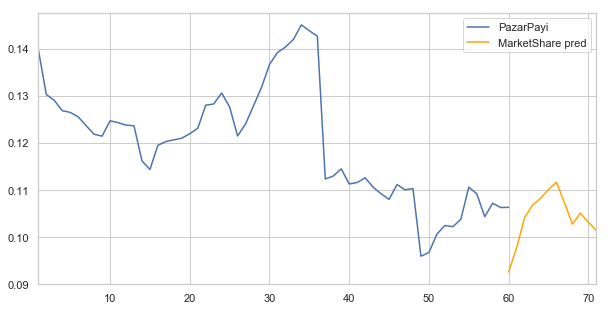

In [24]:
#HOLT WINTER'S METHOD ALLIANZ MARKET SHARE
Allianz.index +=1

ets_stl = ExponentialSmoothing((Allianz.iloc[:, 3]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)

Allianz.iloc[:, 3].plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='MarketShare pred')
plt.show()

c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


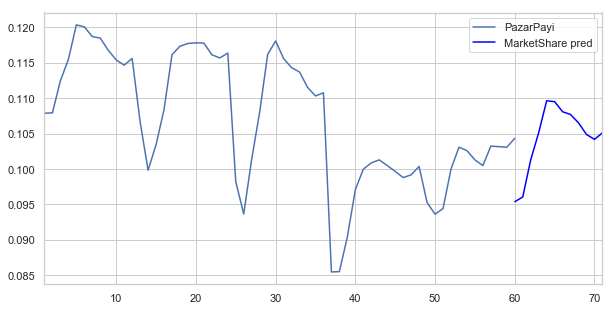

In [25]:
#HOLT WINTER'S METHOD ANADOLU MARKET SHARE
Anadolu.index +=1

ets_stl = ExponentialSmoothing((Anadolu.iloc[:, 3]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)

Anadolu.iloc[:, 3].plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='blue',legend=True,label='MarketShare pred')
plt.show()

c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


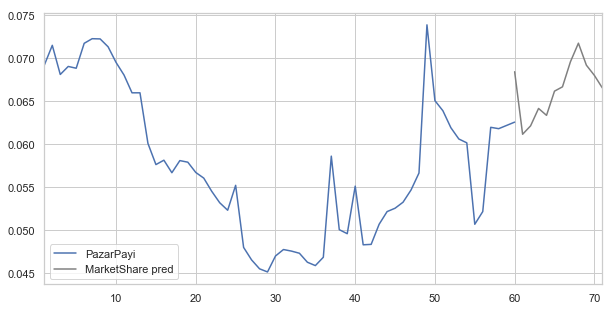

In [26]:
#HOLT WINTER'S METHOD AK MARKET SHARE
Ak.index +=1
ets_stl = ExponentialSmoothing((Ak.iloc[:, 3]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)

Ak.iloc[:, 3].plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='gray',legend=True,label='MarketShare pred')
plt.show()

c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


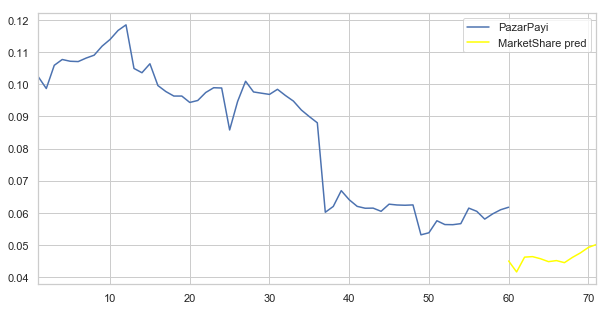

In [27]:
#HOLT WINTER'S METHOD AXA MARKET SHARE
Axa.index +=1
ets_stl = ExponentialSmoothing((Axa.iloc[:, 3]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)
#print(Axa.iloc[:, 3])

Axa.iloc[:, 3].plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='yellow',legend=True,label='MarketShare pred')
plt.legend(loc='best')
plt.show()

c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\fbakis\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


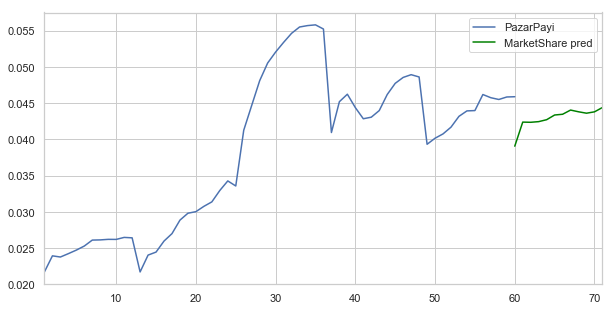

In [28]:
#HOLT WINTER'S METHOD SOMPOJAPAN MARKET SHARE
SompoJapan.index += 1 
ets_stl = ExponentialSmoothing((SompoJapan.iloc[:, 3]) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(12)
#print(SompoJapan.iloc[:, 3])

SompoJapan.iloc[:, 3].plot(kind="line",figsize=(10,5))
ets_stl1.plot(kind="line",figsize=(10,5),color='green',label='MarketShare pred')
plt.legend(loc='best')
plt.show()